In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen/qwen3-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='<think>\nOkay, the user said "Hello". I need to respond appropriately. Since it\'s a greeting, I should start with a friendly greeting. Maybe ask them how they\'re doing. Keep it open-ended so they can talk about anything. Make sure the tone is warm and inviting. Let me check for any typos or errors. Alright, that should do it.\n</think>\n\nHi there! How are you today? 😊 I\'d love to hear what\'s on your mind or help out with anything you need!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 106, 'prompt_tokens': 9, 'total_tokens': 115, 'completion_time': 0.223648294, 'completion_tokens_details': None, 'prompt_time': 0.000396063, 'prompt_tokens_details': None, 'queue_time': 0.072236797, 'total_time': 0.224044357}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_d58dbe76cd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c8168-73e9-7e43-b816-95429524a342-0', to

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

class State(TypedDict):
    topic: str
    characters: str
    settings: str
    premises: str
    story_intro: str

In [5]:
# Nodes
def generate_characters(state: State):
    """Generate characters descriptions"""
    msg = llm.invoke(f"Create two character names and brief traits for a story about {state['topic']}")
    return {"characters": msg.content}

def generate_settings(state: State):
    """Generate a story setting"""
    msg = llm.invoke(f"Describe a vivid setting for a story about {state['topic']}")
    return {"settings": msg.content}

def generate_premises(state: State):
    """Generate a story premise"""
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state['topic']}")
    return {"premises": msg.content}

def combine_elements(state: State):
    """Combine characters, setting, and premises into a story intro"""
    msg = llm.invoke(
        f"Weite a short story introduction using these elements:\n"
        f"Characters: {state['characters']}\n"
        f"Setting: {state['settings']}\n"
        f"Premise: {state['premises']}"
    )
    return {"story_intro": msg.content}

In [7]:
# Build the graph
graph = StateGraph(State)
graph.add_node("characters", generate_characters)
graph.add_node("settings", generate_settings)
graph.add_node("premises", generate_premises)
graph.add_node("combine", combine_elements)

# Define edges
graph.add_edge(START, "characters")
graph.add_edge(START, "settings")
graph.add_edge(START, "premises")
graph.add_edge("characters", "combine")
graph.add_edge("settings", "combine")
graph.add_edge("premises", "combine")
graph.add_edge("combine", END)

# Compile and run
compiled_graph = graph.compile()

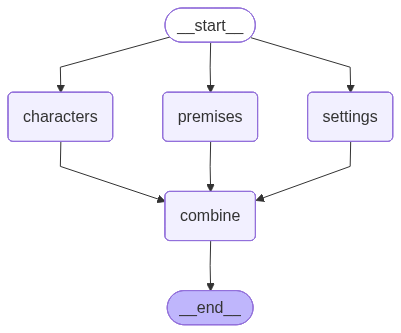

In [8]:
graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [9]:
state = {"topic": "time travel"}
result = compiled_graph.invoke(state)
print(result["story_intro"])

<think>
Okay, let's start by understanding the user's request. They want a short story introduction that incorporates the provided elements: two characters with specific traits and the vivid setting of the Aeon Spire. The premise involves a time travel plot. 

First, I need to recall the characters. Dr. Elara Myles is a theoretical physicist with a personal loss driving her, and Jace "Fixer" Kellan is a rogue historian stuck in a paradox. The setting is the Aeon Spire, a complex time-travel hub with unique features. The premise is about altering the past leading to unintended consequences.

Now, the challenge is to weave these elements into an engaging introduction. I should start by introducing Elara, her motivation, and the setting. Then, introduce Jace as an antagonist or rival. The setting needs to be vivid but not overwhelming. Maybe set their first meeting in the Spire, highlighting its strange aspects.

I need to establish their conflict: Elara wants to prevent changes, Jace's a